In [55]:
import pandas as pd
import warnings
import numpy as np

In [56]:
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('Data\sign_mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [58]:
df.isnull().sum().sum()

0

In [59]:
X = df.drop('label', axis=1)
y = df['label']

In [60]:
X = X / 255.0

In [61]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961


In [62]:
df.shape

(27455, 785)

**PLOTTING**

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
one_sample_ex = X.iloc[1, :].values

In [65]:
one_sample_ex = one_sample_ex.reshape(28, 28)

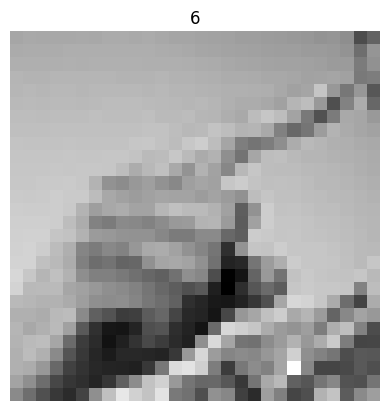

In [66]:
plt.title(y[1])
plt.axis('off')
plt.imshow(one_sample_ex, cmap='gray',);

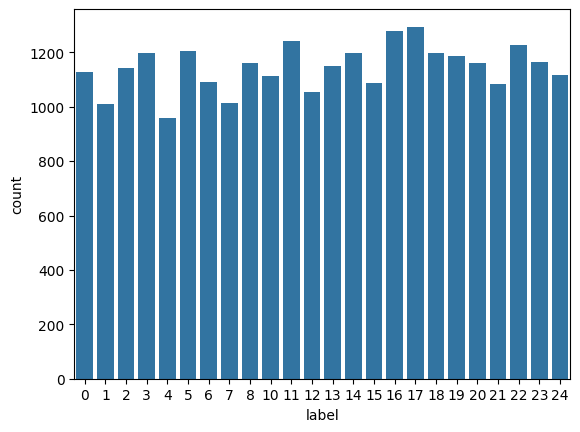

In [67]:
sns.countplot(data=df, x='label');

In [68]:
X.shape

(27455, 784)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [72]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [73]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [74]:
print(X_train.shape, '-' * 10, y_train.shape)
print('=' * 60)
print(X_test.shape, '-' * 10, y_test.shape)

(21964, 28, 28, 1) ---------- (21964, 24)
(5491, 28, 28, 1) ---------- (5491, 24)


**MODEL BUILD**

In [75]:
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [76]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


datagen.fit(X_train)

In [77]:
inp_shape = X_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [82]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [80]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [81]:
hist = model.fit(
    datagen.flow(X_train, y_train, batch_size = 128),
    validation_data=(X_test, y_test),
    shuffle=True,
    verbose=2,
    epochs=10
)

Epoch 1/10
172/172 - 13s - loss: 1.1896 - accuracy: 0.6294 - val_loss: 4.3881 - val_accuracy: 0.0566 - 13s/epoch - 75ms/step
Epoch 2/10
172/172 - 13s - loss: 0.2829 - accuracy: 0.9072 - val_loss: 3.7364 - val_accuracy: 0.1950 - 13s/epoch - 75ms/step
Epoch 3/10
172/172 - 13s - loss: 0.1342 - accuracy: 0.9555 - val_loss: 0.3999 - val_accuracy: 0.8747 - 13s/epoch - 75ms/step
Epoch 4/10
172/172 - 13s - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.0484 - val_accuracy: 0.9874 - 13s/epoch - 78ms/step
Epoch 5/10
172/172 - 14s - loss: 0.0646 - accuracy: 0.9789 - val_loss: 0.0463 - val_accuracy: 0.9873 - 14s/epoch - 79ms/step
Epoch 6/10
172/172 - 14s - loss: 0.0497 - accuracy: 0.9840 - val_loss: 0.0212 - val_accuracy: 0.9924 - 14s/epoch - 81ms/step
Epoch 7/10
172/172 - 13s - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.1204 - val_accuracy: 0.9530 - 13s/epoch - 77ms/step
Epoch 8/10
172/172 - 13s - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0029 - val_accuracy: 0.9995 - 13s/epoch - 76ms/step
